# Filter for Relevant Comments

Dataset contains a lot of unrelated comments to the brand "Sesh." Filter for only related posts & comments before beginning text analysis.

In [267]:
import pandas as pd

comments = pd.read_csv("../data/csv/comments.csv")
comments.head()

,date,text,score,title
0,07/17/2024 14:35,American Zyn nicotine pouches have to have som...,10,American Zyn nicotine pouches have to have som...
1,07/17/2024 14:50,American zyns have been analyzed by MassSpecEv...,68,American Zyn nicotine pouches have to have som...
2,07/17/2024 14:53,I know that's the only thing that makes me act...,4,American Zyn nicotine pouches have to have som...
3,07/17/2024 18:28,All I know is when I use a dif brand the powde...,4,American Zyn nicotine pouches have to have som...
4,07/17/2024 17:50,Just use 3mg and relax. Every other brand I've...,9,American Zyn nicotine pouches have to have som...


In [268]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3388 non-null   object
 1   text    3387 non-null   object
 2   score   3388 non-null   int64 
 3   title   3388 non-null   object
dtypes: int64(1), object(3)
memory usage: 106.0+ KB


In [269]:
# basic data transforms for ease
comments["text"] = comments.text.str.lower()
comments["title"] = comments.title.str.lower()


In [270]:
comments.head()

,date,text,score,title
0,07/17/2024 14:35,american zyn nicotine pouches have to have som...,10,american zyn nicotine pouches have to have som...
1,07/17/2024 14:50,american zyns have been analyzed by massspecev...,68,american zyn nicotine pouches have to have som...
2,07/17/2024 14:53,i know that's the only thing that makes me act...,4,american zyn nicotine pouches have to have som...
3,07/17/2024 18:28,all i know is when i use a dif brand the powde...,4,american zyn nicotine pouches have to have som...
4,07/17/2024 17:50,just use 3mg and relax. every other brand i've...,9,american zyn nicotine pouches have to have som...


In [271]:
# Use regex to find relevant posts

# find comments with "sesh"
# TODO: Coalasce these two regex patterns
sesh_reg = r'sesh'
sesh_comments = comments[(comments.text.str.contains(sesh_reg)) | (comments.title.str.contains(sesh_reg))]

# , but not "smoke sesh" or "study sesh"
non = r"(smoke sesh|study sesh|night sesh|gym sesh|sesh booze|jerk sesh|friday sesh)"
sesh_comments = sesh_comments[(~sesh_comments.text.str.contains(non)) & (~sesh_comments.title.str.contains(non))]
sesh_comments.head()

c:\Users\saidmf\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,date,text,score,title
11,07/18/2024 09:10,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...
48,08/01/2023 02:15,this long long long reply will not be read bu...,1,am i putting pouches in wrong?
77,02/26/2024 20:52,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...
80,04/21/2023 15:27,media,3,anybody have a take or impression on sesh+ or ...
81,04/22/2023 11:47,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...


In [272]:
len(sesh_comments)

272

# Clean Up Comments

Remove media posts, deleted comments and duplicate comments.

In [273]:
# remove invalid
sesh_comments = sesh_comments[(sesh_comments["text"] != "media") & (sesh_comments["text"] != "[deleted]")]

# remove dupes
sesh_comments.drop_duplicates(subset=["date", "text"], inplace=True)

sesh_comments.head()

,date,text,score,title
11,07/18/2024 09:10,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...
48,08/01/2023 02:15,this long long long reply will not be read bu...,1,am i putting pouches in wrong?
77,02/26/2024 20:52,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...
81,04/22/2023 11:47,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...
82,04/21/2023 17:47,i was thinking about making a post about this ...,3,anybody have a take or impression on sesh+ or ...


In [274]:
len(sesh_comments)

241

In [275]:
# save for obs
sesh_comments.to_csv("../data/csv/sesh_comments.csv", index=False)

In [276]:
# load back in
import pandas as pd 

sesh_comments = pd.read_csv("../data/csv/sesh_comments.csv")

# Simple Sentiment Column Via Score

Using the score column, can we get some simple sentiment?

<AxesSubplot:ylabel='Frequency'>

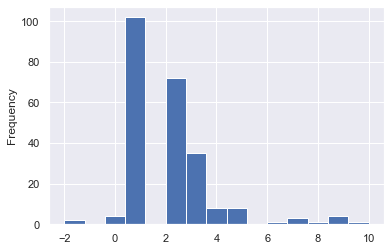

In [277]:
sesh_comments.score.plot.hist(bins=15)

# right-skewed data, might not be useful. Interested to see what the right-most samples are...

In [278]:
sesh_comments[sesh_comments["score"] > 50]

# after filtering for >50 score comments, I've discovered more data to filter

,date,text,score,title


In [279]:
sesh_comments[sesh_comments["score"] > 5]

# interesting sentiment

,date,text,score,title
20,07/14/2024 18:37,sesh mint is my favorite,6,best mint pouch?
33,07/10/2024 15:22,ya zyn can make me nauseous but i also have a ...,9,does zyn make anyone else feel ill?
39,03/27/2024 16:47,a good friend of mine that i've known from the...,9,"first time trying sesh, never even heard of th..."
94,07/16/2024 16:32,"lucy, sesh, zone, zeo for us based ones. when ...",9,phillip morris announces $600 million zyn faci...
109,02/11/2024 14:17,finally a normal product and not some “extreme...,7,sesh doesn’t get much mention around here.
159,03/27/2023 19:04,anyone try sesh nicotine pouches? i just recei...,7,sesh nic pouches? anyone?
160,03/28/2023 06:23,"i haven't tried them, they're made in sweden a...",10,sesh nic pouches? anyone?
188,11/26/2023 13:16,you gonna get to it once you're done with the ...,8,stoked to try this mango sesh
233,06/10/2024 13:00,"fré, zone, sesh, lucy breakers, nic-s are all ...",7,why does the us only get dry portions?
236,03/17/2024 22:53,8mg is just kind of viewed as a higher end of ...,9,why don't we get these strengths in the us?


# Do NLTK

Analyze text and frequency distributions

In [280]:
import nltk
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\saidmf\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saidmf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\saidmf\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\saidmf\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\saidmf\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saidmf\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is alre

True

In [281]:
# analyze frequency distributions 

# remove duplicate comments
list_comments = sesh_comments["text"].tolist()

# turn into words to prep for frequency analysis
words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
words = [w.lower() for w in words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(words)

In [282]:
fd.tabulate(20)

       sesh     pouches    nicotine        like         zyn        good       pouch      flavor          us         get      really         try         one       tried        mint        lucy       mango wintergreen      growth         way 
        119          92          91          86          62          48          48          43          42          40          39          39          37          37          34          33          32          28          28          27 


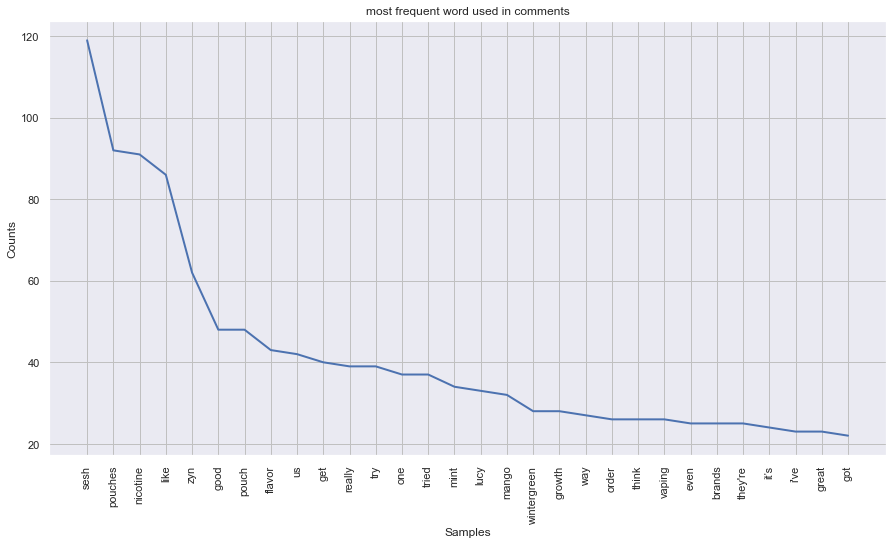

<AxesSubplot:title={'center':'most frequent word used in comments'}, xlabel='Samples', ylabel='Counts'>

In [283]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in comments")

In [284]:
# get text concordance 
text = nltk.Text(words)

In [285]:
text.concordance("zyn")

Displaying 25 of 62 matches:
5 10 words could hahahajaha upper lip zyn even tell really matter (had talk cs 
 lips really bad currently use rogue, zyn rogue zyn definitely best flavor, cof
ly bad currently use rogue, zyn rogue zyn definitely best flavor, coffee zyn go
ue zyn definitely best flavor, coffee zyn good rogue nailed cinnamon, honey lem
uy nicotine pouches online mostly get zyn (i 1000 points rewards), occasionally
e trying new ones none really compare zyn zyn best even though 15 per container
ying new ones none really compare zyn zyn best even though 15 per container (20
american velo trash honestly american zyn best gas stations whatnot around that
s lucy seems one found really enjoyed zyn on, velo rogue suck! although i've br
gotten yet let know though compare ya zyn ones liked tried lucy unfortunately o
y stock importantly strength line on! zyn (9 mg sesh seems hit 6mg zyn) 6-8 usu
 something thats ass (juicehead) also zyn enjoyer usually look deals keep handf
joyer usual

In [286]:
# find bi-grams
finder = nltk.collocations.BigramCollocationFinder.from_words(words)

finder.ngram_fd.tabulate(25)

 ('nicotine', 'pouches')        ('juice', 'head')        ('sesh', 'mango')    ('growth', 'markets')       ('pretty', 'good')        ("i've", 'tried')      ('nicotine', 'gum')    ('nicotine', 'pouch')          ('try', 'sesh')         ('sesh', 'mint')         ('feel', 'like')  ('sesh', 'wintergreen')         ('lucy', 'sesh')         ('apple', 'ice')     ('moist', 'pouches')          ('want', 'try')      ('sesh', 'pouches') ('nicotine', 'pouches,')      ('market', 'share')        ('tried', 'sesh')          ('i’m', 'sure')   ('swedish', 'pouches')         ('nic', 'pouch')         ('like', 'mint')       ('lucy,', 'sesh,') 
                      20                       11                        8                        8                        7                        7                        7                        7                        6                        6                        6                        6                        5                        5                        5

# ChatGPT Sentiment Analysis

Using the the openai API, analyze the sentimnet of comments. Join into dataset.

In [287]:
ai_rates = pd.read_csv("../data/csv/sentiments.csv")

ai_rates.head()

,sentiment
0,irrelevant
1,irrelevant
2,negative
3,irrelevant
4,positive


In [288]:
ai_rates.value_counts()

sentiment 
irrelevant    104
positive       42
neutral        30
negative       25
dtype: int64

In [289]:
ai_rates = ai_rates.apply(lambda x: x.str.rstrip("."))

In [290]:
ai_rates.value_counts()

sentiment 
irrelevant    104
positive       42
neutral        30
negative       25
dtype: int64

In [291]:
rate_comments = pd.merge(sesh_comments, ai_rates, left_index=True, right_index=True)

rate_comments.head()

,date,text,score,title,sentiment
0,07/18/2024 09:10,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...,irrelevant
1,08/01/2023 02:15,this long long long reply will not be read bu...,1,am i putting pouches in wrong?,irrelevant
2,02/26/2024 20:52,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...,negative
3,04/22/2023 11:47,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...,irrelevant
4,04/21/2023 17:47,i was thinking about making a post about this ...,3,anybody have a take or impression on sesh+ or ...,positive


In [292]:
# save for obs
rate_comments.to_csv("../data/csv/sesh_sentiment.csv", index=False)

<AxesSubplot:>

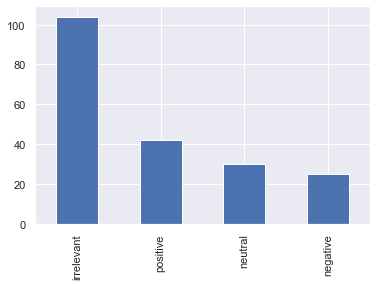

In [293]:
rate_comments.sentiment.value_counts().plot.bar()

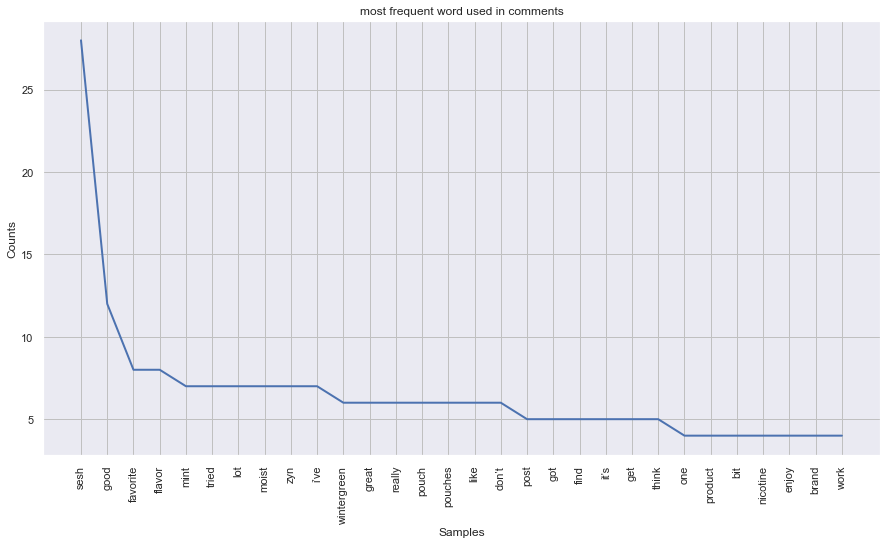

<AxesSubplot:title={'center':'most frequent word used in comments'}, xlabel='Samples', ylabel='Counts'>

In [294]:
import matplotlib.pyplot as plt

# analyze frequency distributions of positive comments

# remove duplicate comments
pos_comments = rate_comments[rate_comments["sentiment"] == "positive"]["text"].tolist()

# turn into words to prep for frequency analysis
pos_words = " ".join(pos_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
pos_words = [w.lower() for w in pos_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(pos_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in comments")

In [295]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(pos_words)

finder.ngram_fd.tabulate(25)

       ('sesh', 'mint')    ('mint', 'favorite')        ('sesh', 'good') ('wintergreen', 'sesh')         ('also', 'got')     ('brand', 'really')      ('really', 'good')          ('put', 'lot')         ('lot', 'work')  ('actually', 'pretty')      ('moist', 'pouch')       ('tried', 'sesh')     ('barely', 'moist')       ('sesh', 'clear')   ('favorite', 'pouch')   ('hands', 'favorite')       ('lot', 'people')    ('packed', 'nicely')       ('juice', 'head')  ('thinking', 'making')      ('making', 'post')  ('post', 'hahahahaha') ('hahahahaha', 'order')  ('order', 'nicokick,')  ('nicokick,', 'sesh+') 
                      3                       3                       3                       2                       2                       2                       2                       2                       2                       2                       2                       2                       2                       2                       2                       2                

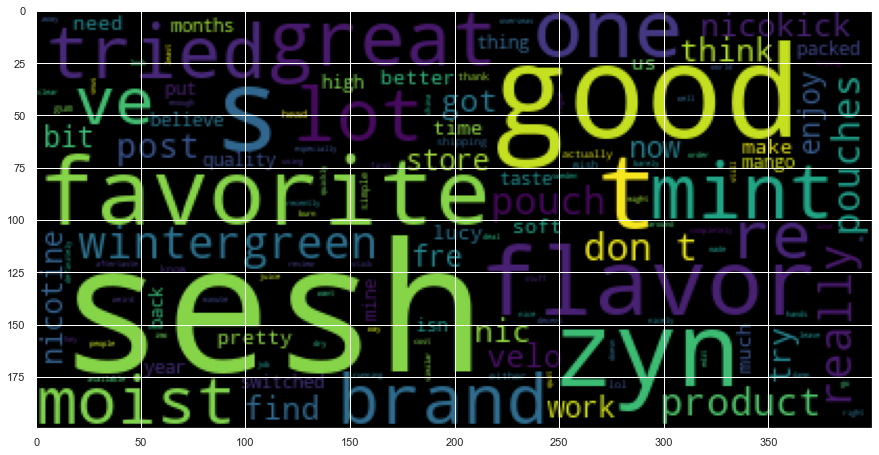

In [296]:
from wordcloud import WordCloud

# view word cloud of positive comments
plt.figure(figsize=(15,8))
wc = WordCloud().generate(" ".join(pos_comments))

plt.imshow(wc)

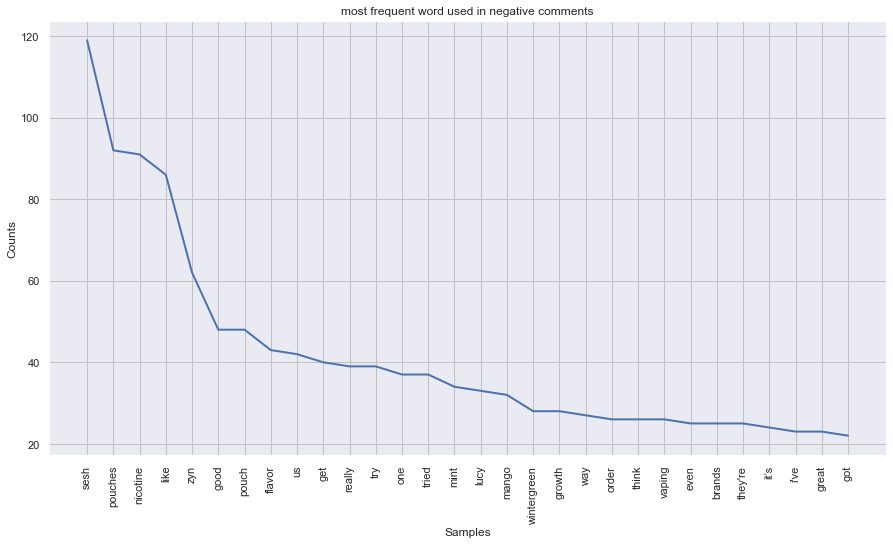

<AxesSubplot:title={'center':'most frequent word used in negative comments'}, xlabel='Samples', ylabel='Counts'>

In [297]:
# analyze frequency distributions of negative comments

# remove duplicate comments
neg_comments = rate_comments[rate_comments["sentiment"] == "negative"]["text"].tolist()

# turn into words to prep for frequency analysis
neg_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in negative comments")

In [298]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(neg_words)

finder.ngram_fd.tabulate(25)

 ('nicotine', 'pouches')        ('juice', 'head')        ('sesh', 'mango')    ('growth', 'markets')       ('pretty', 'good')        ("i've", 'tried')      ('nicotine', 'gum')    ('nicotine', 'pouch')          ('try', 'sesh')         ('sesh', 'mint')         ('feel', 'like')  ('sesh', 'wintergreen')         ('lucy', 'sesh')         ('apple', 'ice')     ('moist', 'pouches')          ('want', 'try')      ('sesh', 'pouches') ('nicotine', 'pouches,')      ('market', 'share')        ('tried', 'sesh')          ('i’m', 'sure')   ('swedish', 'pouches')         ('nic', 'pouch')         ('like', 'mint')       ('lucy,', 'sesh,') 
                      20                       11                        8                        8                        7                        7                        7                        7                        6                        6                        6                        6                        5                        5                        5

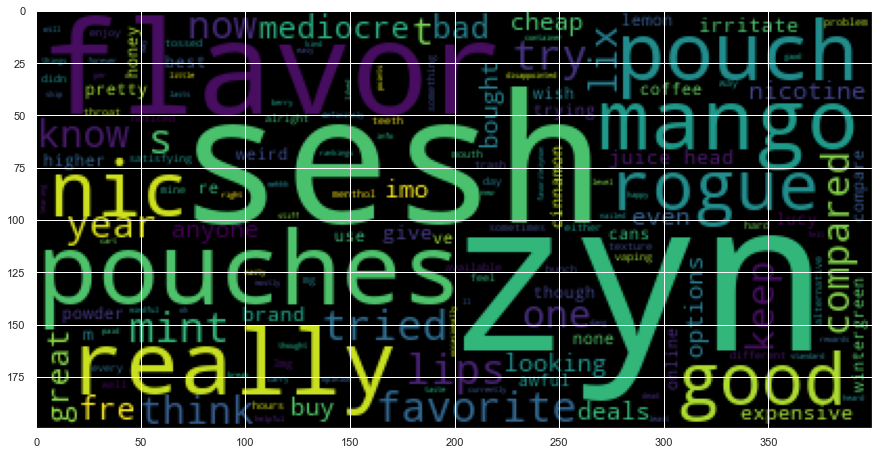

In [299]:
# view word cloud of negative comments
plt.figure(figsize=(15,8))
wc = WordCloud().generate(" ".join(neg_comments))

plt.imshow(wc)

# Break Down Flavors In Different Comments

How popular are the terms "mango", "mint" and "wintergreen" across different types of sentiments (positive, negative, neutral?

<AxesSubplot:>

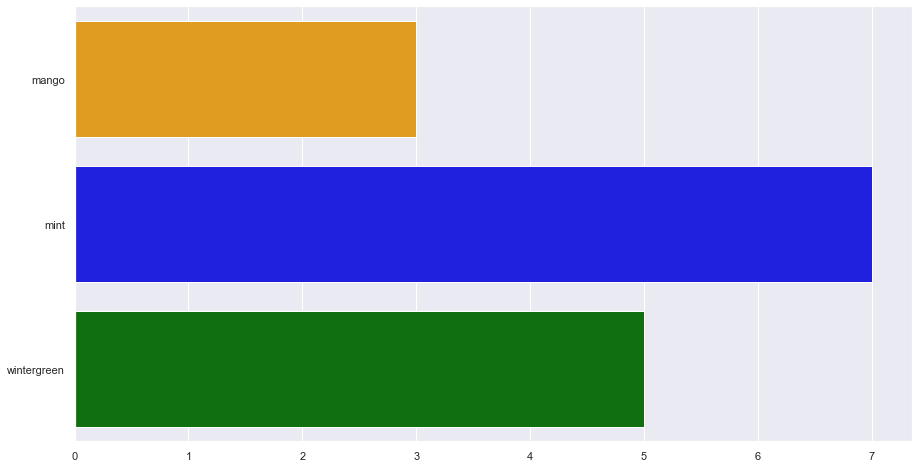

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

flavors = ["mango", "mint", "wintergreen"]
colors = ["orange", "blue", "green"]

# analyze frequency on flavors in positive comments
pos_comments = rate_comments[rate_comments["sentiment"] == "positive"]["text"].tolist()

pos_rates = []
for flavor in flavors:
    count = len([1 for comment in pos_comments if flavor in comment])
    pos_rates.append(count)

plt.figure(figsize=(15,8))
sns.barplot(x=pos_rates, y=flavors, palette=colors)

<AxesSubplot:>

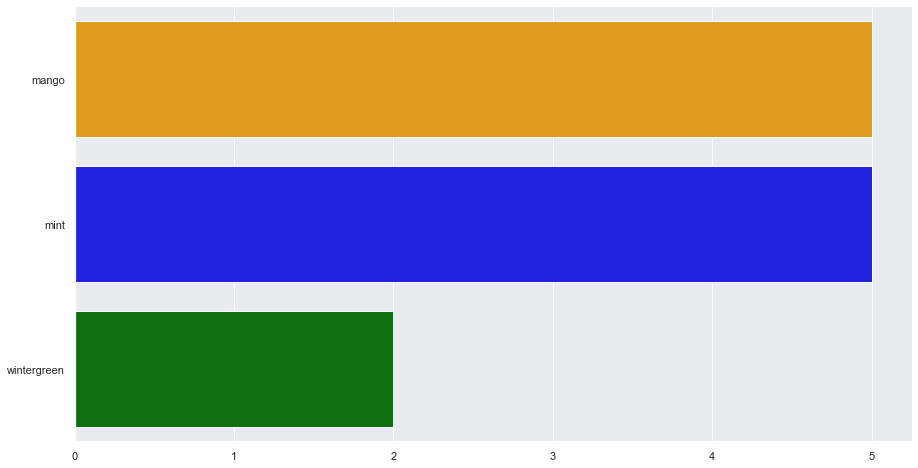

In [301]:
# analyze frequency on flavors in negative comments
neg_comments = rate_comments[rate_comments["sentiment"] == "negative"]["text"].tolist()

neg_rates = []
for flavor in flavors:
    count = sum([1 for comment in neg_comments if flavor in comment])
    neg_rates.append(count)

plt.figure(figsize=(15,8))
sns.barplot(x=neg_rates, y=flavors, palette=colors)

In [302]:
# take a look at actual negative flavor comments
[comment for comment in neg_comments if "mango" in comment]

['they are my favorite mango. i wish sesh mango was as good as lucy is',
 'nics is great. sesh is mehhh.. very nasty taste in my opinion but you may like it! the mango was gawd awful. the wintergreen is pretty good. nics are all great but be mindful the pouches break pretty dang easy.',
 'this is helpful info as i had the mango in my cart, i think i’ll skip the sesh and try a few of the nic-s. i’ve heard bad things about the fre like it tearing up lips really bad. i currently use rogue, on and zyn. rogue and zyn definitely have the best flavor, the coffee zyn is too good. and the rogue nailed it with the cinnamon, honey lemon, and mango. looking for higher nic level pouches though, on is ok but the only good flavor on has is the coffee. the other flavors are just so bad',
 'mango sesh is the only mango flavor i did not like',
 "agreed on the juice head. tried one mango strawberry mint, had it in for about three minutes then tossed the rest on the tin in the trash. horrible stuff. my go

# Neutrality Analyze

How could we convert neutral experiences into positive?

# Temporal Trends

In [303]:
# get sentiment across time
dummy_vars = pd.get_dummies(rate_comments.sentiment)

dummy_vars.head()

,irrelevant,negative,neutral,positive
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1


In [304]:
encoded = pd.merge(rate_comments.drop(columns=["sentiment"]), dummy_vars, left_index=True, right_index=True)

encoded.head()

,date,text,score,title,irrelevant,negative,neutral,positive
0,07/18/2024 09:10,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...,1,0,0,0
1,08/01/2023 02:15,this long long long reply will not be read bu...,1,am i putting pouches in wrong?,1,0,0,0
2,02/26/2024 20:52,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...,0,1,0,0
3,04/22/2023 11:47,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...,1,0,0,0
4,04/21/2023 17:47,i was thinking about making a post about this ...,3,anybody have a take or impression on sesh+ or ...,0,0,0,1


In [305]:
encoded["date"] = pd.to_datetime(encoded["date"])
sent_data = encoded.set_index("date")
sent_data.head()

,text,score,title,irrelevant,negative,neutral,positive
date,,,,,,,
2024-07-18 09:10:00,i've noticed pouches with synthetic nicotine (...,3,american zyn nicotine pouches have to have som...,1,0,0,0
2023-08-01 02:15:00,this long long long reply will not be read bu...,1,am i putting pouches in wrong?,1,0,0,0
2024-02-26 20:52:00,they are my favorite mango. i wish sesh mango ...,2,anybody ever had these? picked these up at a g...,0,1,0,0
2023-04-22 11:47:00,"haven’t tried the sesh, but the nic-s pouches ...",4,anybody have a take or impression on sesh+ or ...,1,0,0,0
2023-04-21 17:47:00,i was thinking about making a post about this ...,3,anybody have a take or impression on sesh+ or ...,0,0,0,1


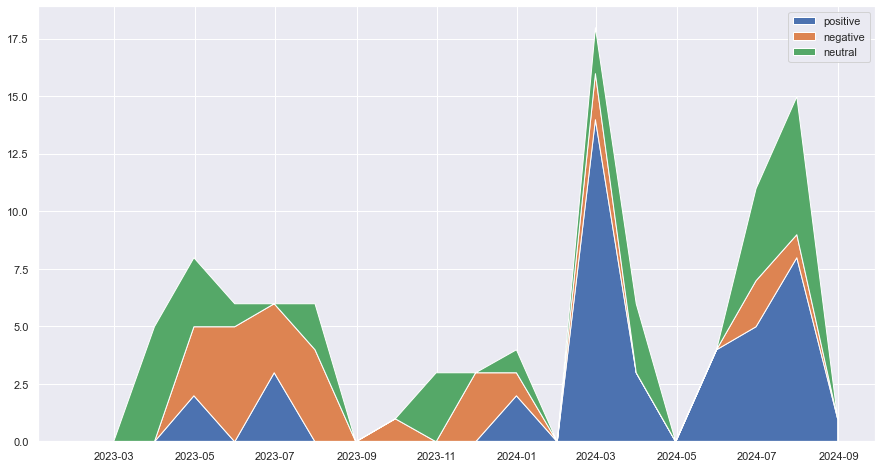

In [306]:
import seaborn as sns
import datetime as dt

sent_monthly = sent_data.resample("1M")[["positive", "negative", "neutral", "irrelevant"]].sum()

# cut off data before 2023 01 due to small sample size
select_date = sent_monthly[sent_monthly.index >= dt.datetime(2023, 1, 1)]

positive = select_date["positive"]
negative = select_date["negative"]
neutral = select_date["neutral"]

plt.figure(figsize=(15,8))
# plt.ylim(0, 10)

sns.set_theme() 

plt.stackplot(positive.index, positive.values, negative.values, neutral.values)
plt.legend(labels=['positive', 'negative', "neutral", "irrelevant"])

# Temporal Breakdown

It seems like 2023 data entailed a larger share of negative comments, while 2024 saw the opposite. Let's analyze the frequency of words in these 2 years.

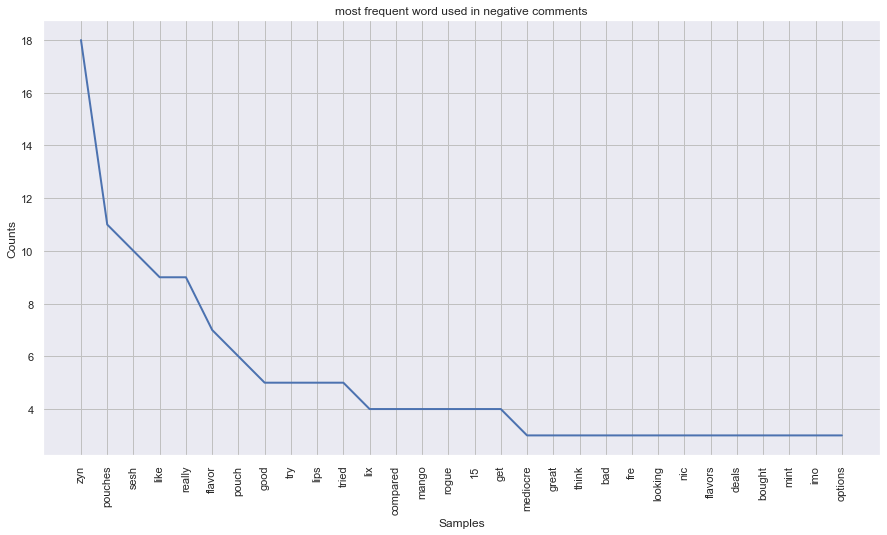

<AxesSubplot:title={'center':'most frequent word used in negative comments'}, xlabel='Samples', ylabel='Counts'>

In [307]:
# analyze frequency distributions of negative comments in 2023

date_comments = rate_comments.set_index("date")
date_comments.index = pd.to_datetime(date_comments.index)

# select subset of negative comments
list_comments = date_comments[(date_comments["sentiment"] == "negative") & (date_comments.index < dt.datetime(2023, 12, 31))]["text"].tolist()

# turn into words to prep for frequency analysis
neg_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in negative comments")

In [308]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(neg_words)

finder.ngram_fd.tabulate(25)

      ('15', 'pouches')       ('juice', 'head')       ('nics', 'great')      ('lips', 'really')        ('nic', 'pouch')    ('zyn', 'expensive')     ('expensive', '15')    ('try', 'something')    ('sesh', 'mediocre') ('mediocre', 'thought')     ('thought', 'felt')       ('felt', 'stiff')       ('stiff', 'like')      ('like', 'powder')     ('powder', 'liked')        ('liked', 'lix')       ('lix', 'flavor')     ('flavor', 'lasts')    ('lasts', 'forever')   ('forever', 'you’re')      ('you’re', 'dead')       ('dead', 'right')        ('right', 'i’m')        ('i’m', 'happy')       ('happy', 'paid') 
                      3                       3                       2                       2                       2                       2                       2                       2                       1                       1                       1                       1                       1                       1                       1                       1                

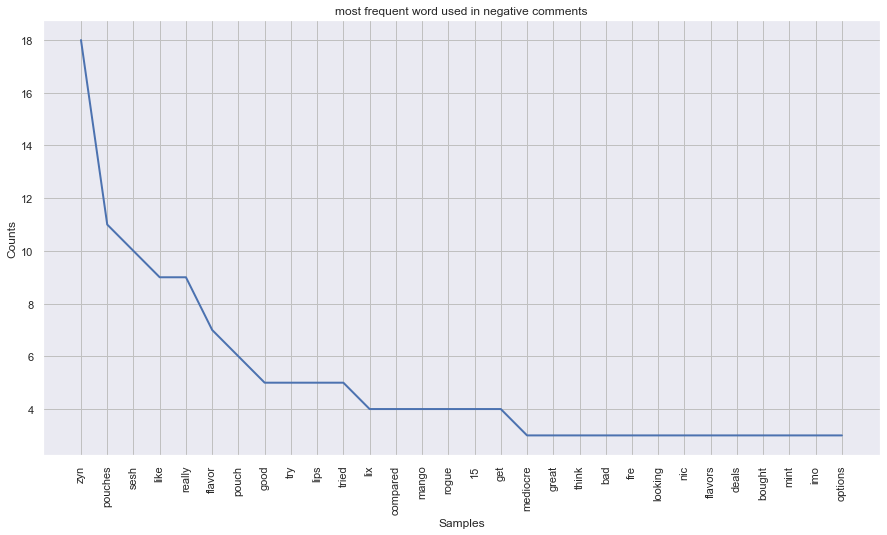

<AxesSubplot:title={'center':'most frequent word used in negative comments'}, xlabel='Samples', ylabel='Counts'>

In [309]:
# analyze frequency distributions of positive comments in 2023

# select subset of negative comments
list_comments = date_comments[(date_comments["sentiment"] == "positive") & (date_comments.index < dt.datetime(2023, 12, 31))]["text"].tolist()

# turn into words to prep for frequency analysis
pos_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in negative comments")

In [310]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(pos_words)

finder.ngram_fd.tabulate(25)

            ('', 'i')          ('a', 'few')     ('the', 'flavor')        ('and', 'the')      ('the', 'sesh+')      ('sesh+', 'are')       ('also', 'got')           ('zyn', '')          ('a', 'lot')         ('i', 'need')     ('juice', 'head')              ('', '')          ('i', 'was')   ('was', 'thinking') ('thinking', 'about')   ('about', 'making')       ('making', 'a')         ('a', 'post')     ('post', 'about')     ('about', 'this')      ('this', 'just')       ('just', 'now') ('now', 'hahahahaha')   ('hahahahaha', 'i')        ('i', 'order') 
                    5                     3                     3                     2                     2                     2                     2                     2                     2                     2                     2                     2                     1                     1                     1                     1                     1                     1                     1                     1          

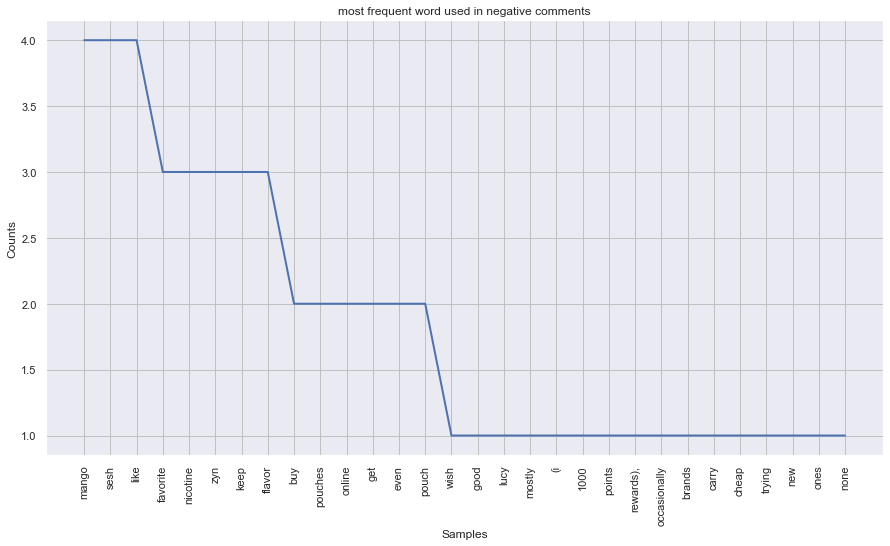

<AxesSubplot:title={'center':'most frequent word used in negative comments'}, xlabel='Samples', ylabel='Counts'>

In [311]:
# analyze frequency distributions of negative comments in 2024

# select subset of negative comments
list_comments = date_comments[(date_comments["sentiment"] == "negative") & (date_comments.index >= dt.datetime(2024, 1, 1))]["text"].tolist()

# turn into words to prep for frequency analysis
neg_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in negative comments")

In [312]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(neg_words)

finder.ngram_fd.tabulate(25)

            ('sesh', 'mango')       ('nicotine', 'pouches')         ('pouches', 'online')         ('favorite', 'mango')             ('mango', 'wish')              ('wish', 'sesh')             ('mango', 'good')              ('good', 'lucy')               ('lucy', 'buy')           ('buy', 'nicotine')          ('online', 'mostly')             ('mostly', 'get')                ('get', 'zyn')                 ('zyn', '(i')                ('(i', '1000')            ('1000', 'points')       ('points', 'rewards),') ('rewards),', 'occasionally')       ('occasionally', 'get')             ('get', 'brands')           ('brands', 'carry')            ('carry', 'cheap')             ('cheap', 'like')            ('like', 'trying')             ('trying', 'new') 
                            2                             2                             2                             1                             1                             1                             1                             1          

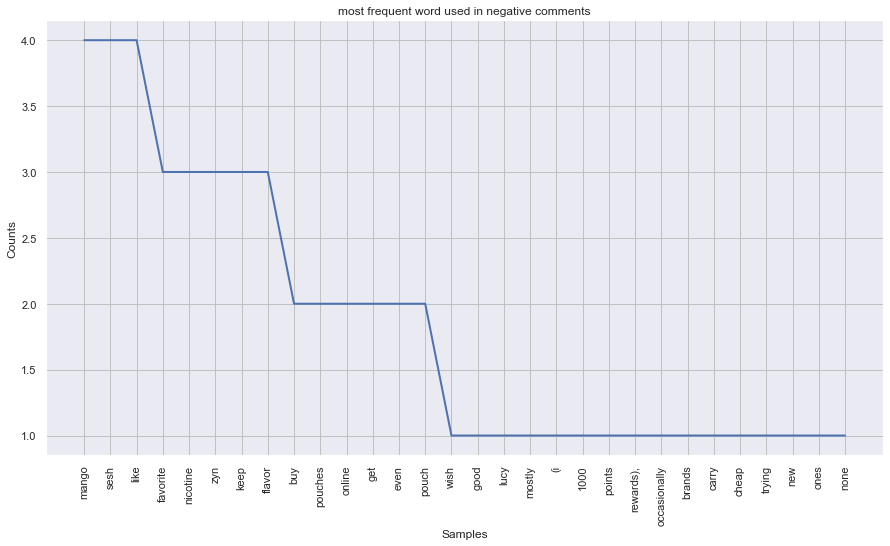

<AxesSubplot:title={'center':'most frequent word used in negative comments'}, xlabel='Samples', ylabel='Counts'>

In [313]:
# analyze frequency distributions of positive comments in 2024

# select subset of negative comments
list_comments = date_comments[(date_comments["sentiment"] == "positive") & (date_comments.index >= dt.datetime(2024, 1, 1))]["text"].tolist()

# turn into words to prep for frequency analysis
pos_words = " ".join(list_comments).replace(".", " ").split(" ")

# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
neg_words = [w.lower() for w in neg_words if w.lower() not in stopwords and w != "" and w != " "]

fd = nltk.FreqDist(neg_words)

plt.figure(figsize=(15,8))
fd.plot(30, title="most frequent word used in negative comments")

In [314]:
# find bi-grams of positive comments
finder = nltk.collocations.BigramCollocationFinder.from_words(pos_words)

finder.ngram_fd.tabulate(25)

         ('', 'i') ('my', 'favorite')       ('a', 'lot')     ('for', 'the')       ('a', 'bit')      ('lot', 'of')       ('', 'they')        ('', 'but')     ('i', 'think')   ('sesh', 'mint')     ('mint', 'is')       ('is', 'my')     ('but', 'the')       ('here', '')           ('', '')    ('sesh', 'and')     ('sesh', 'is')        ('is', 'a')    ('but', 'they')       ('', 'sesh')       ('', 'much')       ('but', 'i')       ('i', 'did')     ('have', 'to')       ('i', 'can') 
                23                  6                  5                  5                  4                  4                  4                  4                  4                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  3                  2 


# Overall Counts

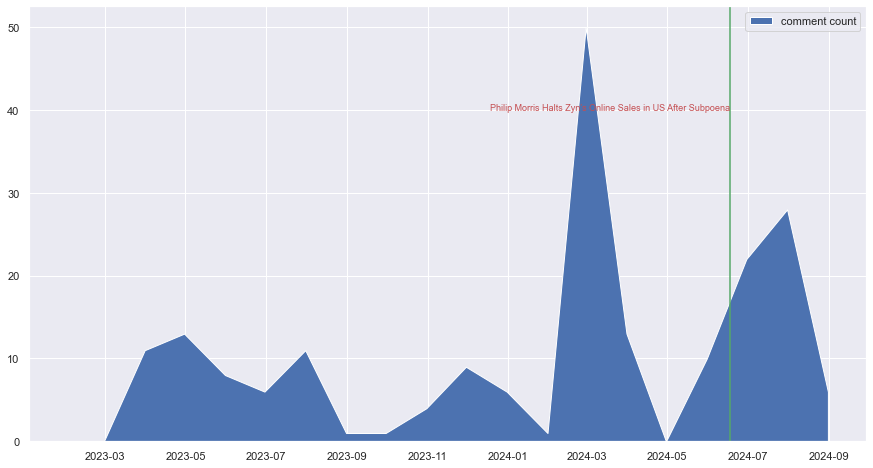

In [315]:
total_comments = select_date.sum(axis=1)

plt.figure(figsize=(15,8))
# plt.ylim(0, 10)

sns.set_theme() 

plt.stackplot(total_comments.index, total_comments.values)
plt.legend(labels=['comment count'])

plt.text(x=dt.datetime(2023, 12, 18), y=40, s='Philip Morris Halts Zyn’s Online Sales in US After Subpoena', color='r', fontsize=9)
plt.axvline(x=dt.datetime(2024, 6, 18), color='g', label='axvline - full height')

